# Resampling Closing Prices

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stock_ticker = 'AAPL'
start_date = '2020-01-01' # use format YYYY-MM-DD
end_date = '2024-01-02'

data = yf.download( stock_ticker, start= start_date, end = end_date ) 

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146957,72.753839,71.926930,72.497545,108872000
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200


In [4]:
data.dropna(inplace=True)

In [5]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,138.377811,139.863375,136.743543,138.247375,9.895211e+07
std,33.459341,33.579799,33.319774,33.453057,5.439653e+07
min,54.378578,55.379531,51.528412,55.277740,2.404830e+07
25%,120.763407,122.008179,119.225833,120.869269,6.407675e+07
50%,143.250969,144.829650,141.584391,143.100299,8.467540e+07
75%,163.691669,165.974631,162.434235,163.960287,1.155069e+08
max,196.669754,198.168771,195.567834,196.580412,4.265100e+08


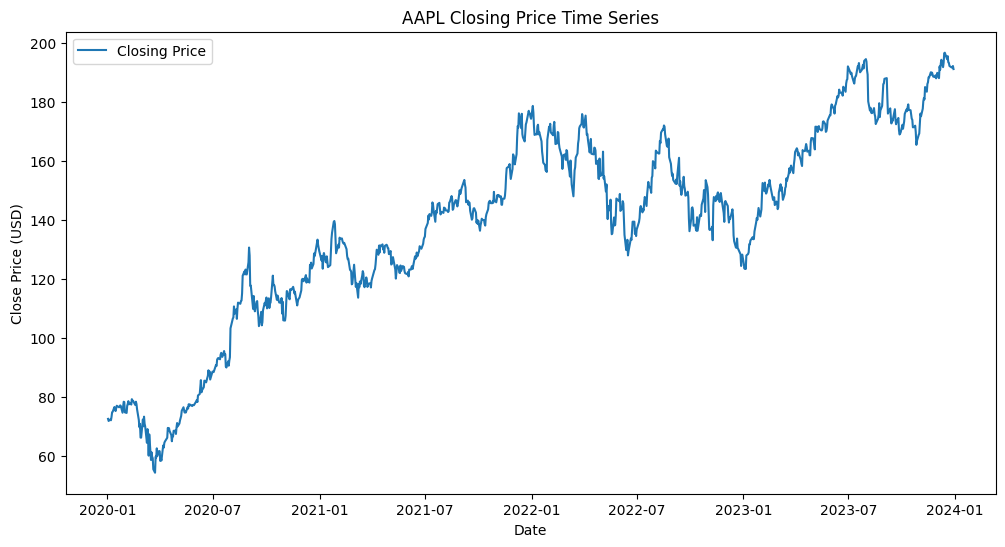

In [6]:
# Visualize the closing prices

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.title(f"{stock_ticker} Closing Price Time Series")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

## 1. Resampling data to weekly and monthly frequency

In [7]:
data_weekly = data['Close'].resample('W').last()

In [8]:
data_weekly.head()

Ticker,AAPL
Date,
2020-01-05,71.914810
2020-01-12,75.033875
2020-01-19,77.064888
2020-01-26,76.963333
2020-02-02,74.835602


In [9]:
data_monthly = data['Close'].resample('ME').last()

In [10]:
data_monthly.head()

Ticker,AAPL
Date,
2020-01-31,74.835602
2020-02-29,66.251831
2020-03-31,61.630035
2020-04-30,71.205711
2020-05-31,77.264900


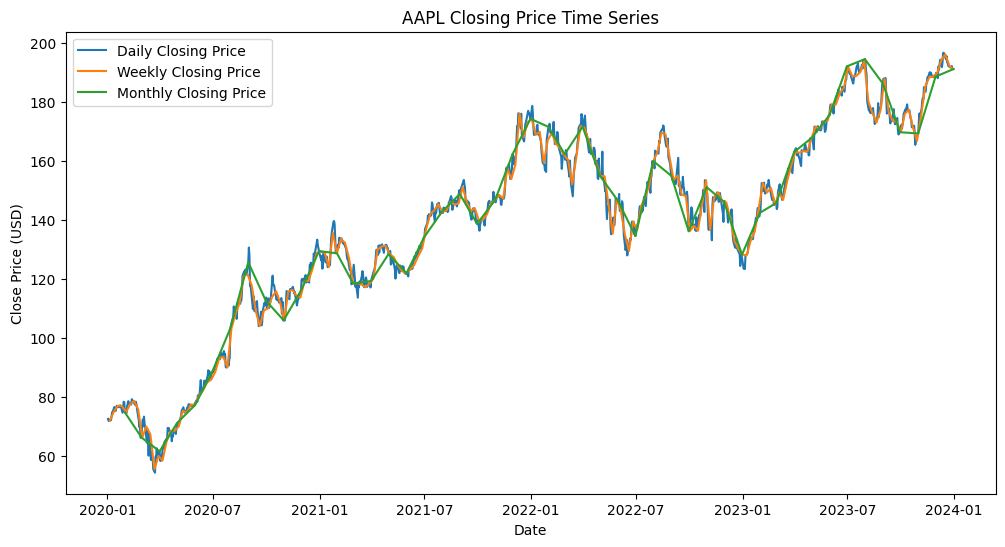

In [11]:
# Visualize resampled data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Daily Closing Price')
plt.plot(data_weekly, label='Weekly Closing Price')
plt.plot(data_monthly, label='Monthly Closing Price')
plt.title(f"{stock_ticker} Closing Price Time Series")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

## 2. Calculate daily and log returns

In [12]:
data['Daily_Return'] = data['Close'].pct_change()
data['Log_Return'] = (data['Close'] / data['Close'].shift(1)).apply(lambda x: np.log(x))

In [13]:
data.dropna(inplace=True)

In [14]:
data.head()

Price,Close,High,Low,Open,Volume,Daily_Return,Log_Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800,-0.009722,-0.009770
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200,0.007968,0.007937
2020-01-07,72.146957,72.753839,71.926930,72.497545,108872000,-0.004703,-0.004714
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200,0.016086,0.015958
2020-01-09,74.864639,75.058066,74.035310,74.286764,170108400,0.021241,0.021019


## 3. Moving avarages as features

In [15]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

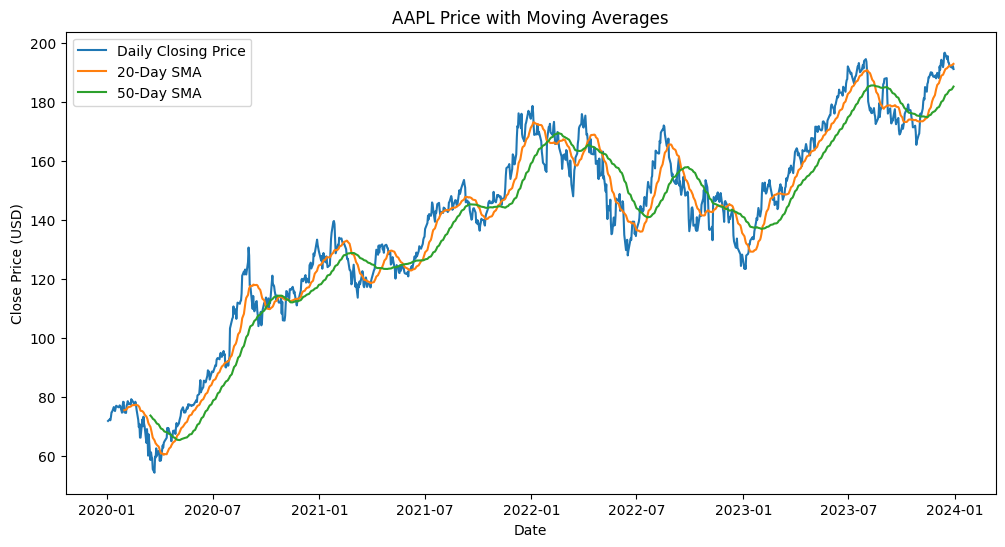

In [16]:
# Visualize moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Daily Closing Price')
plt.plot(data['SMA_20'], label='20-Day SMA')
plt.plot(data['SMA_50'], label='50-Day SMA')
plt.title(f"{stock_ticker} Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

## 4. Volatilty (using rolling standard deviation of returns)

In [17]:
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()

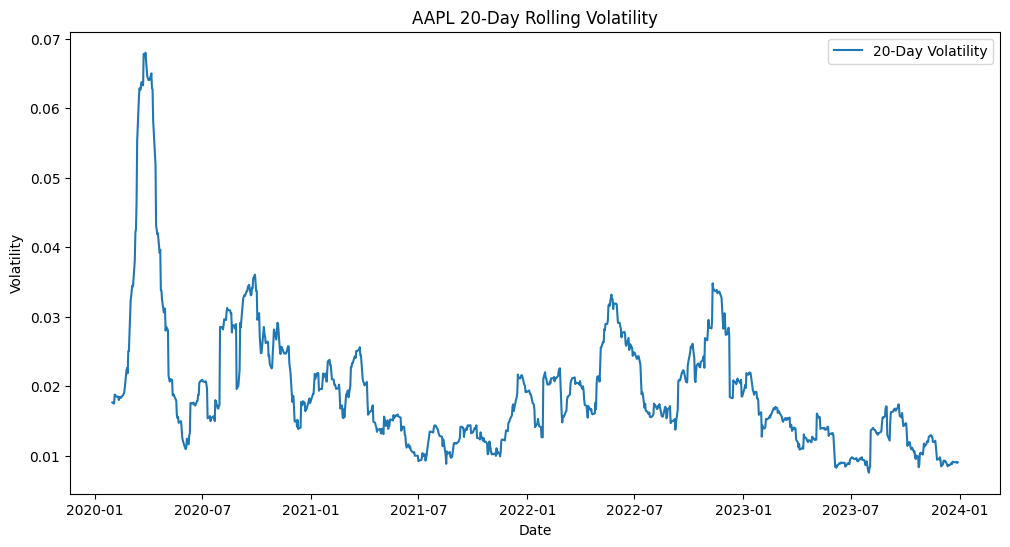

In [18]:
# Plot the visualize
plt.figure(figsize=(12, 6))
plt.plot(data['Volatility'], label='20-Day Volatility')
plt.title(f"{stock_ticker} 20-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

In [19]:
data.dropna(inplace=True)

In [20]:
data.head()

Price,Close,High,Low,Open,Volume,Daily_Return,Log_Return,SMA_20,SMA_50,Volatility
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2020-03-16,58.702312,62.790941,58.166693,58.639296,322423600,-0.128647,-0.137708,69.920358,73.747535,0.061639
2020-03-17,61.283455,62.434667,57.778910,59.986821,324056000,0.043970,0.043031,69.118869,73.534908,0.062905
2020-03-18,59.783230,60.590293,57.468680,58.110939,300233600,-0.024480,-0.024785,68.186384,73.280815,0.062721
2020-03-19,59.325172,61.278603,58.799249,59.957735,271857200,-0.007662,-0.007691,67.271227,73.024380,0.062726
2020-03-20,55.558876,61.033814,55.258347,59.906832,401693200,-0.063486,-0.065590,66.255613,72.669407,0.063765


In [21]:
data.to_csv('AAPL_time_series_features.csv')